# Statistical Thinking in Python

## Graphical exploratory data analysis

        Explanatory data analysis can never be the whole story, 
        but nothing else can serve as the foundation stone -- John Tukey 

### Plotting a histogram of iris data

In [5]:
import numpy as np

# np.savetxt('setosa_petal_length.txt', setosa_petal_length, delimiter=',') # save ndarray to textfile
versicolor_petal_length = np.genfromtxt('datasets/versicolor_petal_length.txt', delimiter=',') #load ndarray from textfile
print(versicolor_petal_length)

[ 4.7  4.5  4.9  4.   4.6  4.5  4.7  3.3  4.6  3.9  3.5  4.2  4.   4.7  3.6
  4.4  4.5  4.1  4.5  3.9  4.8  4.   4.9  4.7  4.3  4.4  4.8  5.   4.5  3.5
  3.8  3.7  3.9  5.1  4.5  4.5  4.7  4.4  4.1  4.   4.4  4.6  4.   3.3  4.2
  4.2  4.2  4.3  3.   4.1]


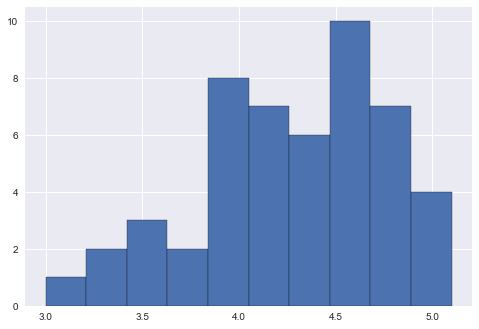

In [6]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Force to show outlines or borders on bins
plt.rcParams["patch.force_edgecolor"] = True

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

### Axis labels!

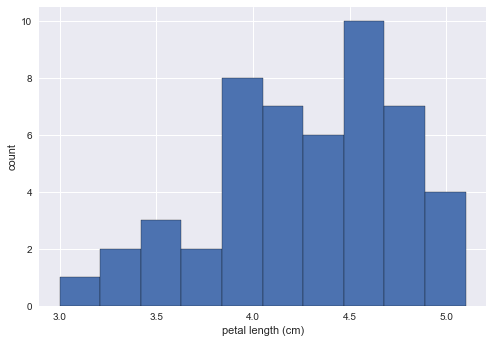

In [7]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes

_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram

plt.show()

### Adjusting the number of bins in a histogram

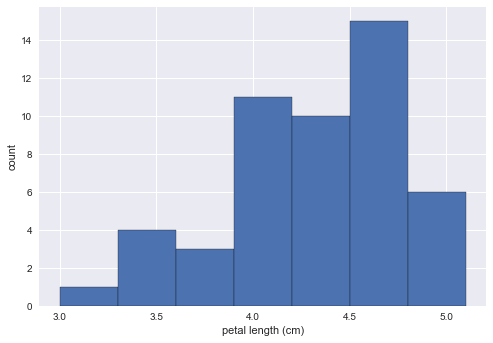

In [8]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


In [11]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

X = iris.data[:, :2]# we only take the first two features.

print(list(data.target_names))
Y = iris.target

print(type(X))
print(type(Y))

df = pd.DataFrame(data.data, columns=data.feature_names)

df['species'] = Y # Add target column as new column to DataFrame

df[df['species'] == 0]

print(df.head())
print(df.tail())


# data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])

# print(data1.head())


['setosa', 'versicolor', 'virginica']
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               

### Swarm plot

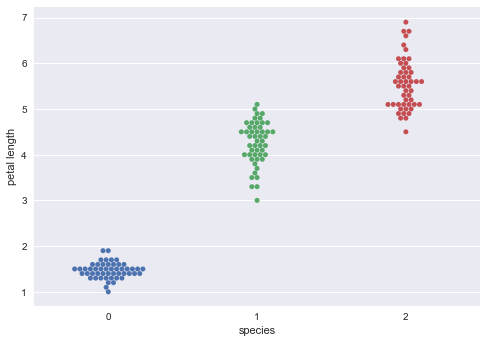

In [12]:
# Create bee swarm plot with Seaborn's default settings
_=sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_=plt.xlabel('species')
_=plt.ylabel('petal length')

# Show the plot

plt.show()

### Computing the ECDF (Plotting all of your data: Empirical cumulative distribution functions)

Problem: Use a graph (ex. a Swarm plot, shown above). Try to figure out how the plot should be if we want to show the number of votes for Obama vs the name of the States. When we work with a huge number of datapoints, it's more graphical and easier to understand if we use ECDF. 

In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n # n+1 because the last element is not inclusive. 0 <= Y <= 1

    return x, y

A, B = ecdf(versicolor_petal_length)

print("X: ", A, "\n\nY: ", B)

X:  [ 3.   3.3  3.3  3.5  3.5  3.6  3.7  3.8  3.9  3.9  3.9  4.   4.   4.   4.
  4.   4.1  4.1  4.1  4.2  4.2  4.2  4.2  4.3  4.3  4.4  4.4  4.4  4.4  4.5
  4.5  4.5  4.5  4.5  4.5  4.5  4.6  4.6  4.6  4.7  4.7  4.7  4.7  4.7  4.8
  4.8  4.9  4.9  5.   5.1] 

Y:  [ 0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22  0.24
  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44  0.46  0.48
  0.5   0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68  0.7   0.72
  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92  0.94  0.96
  0.98  1.  ]


### Plotting the ECDF

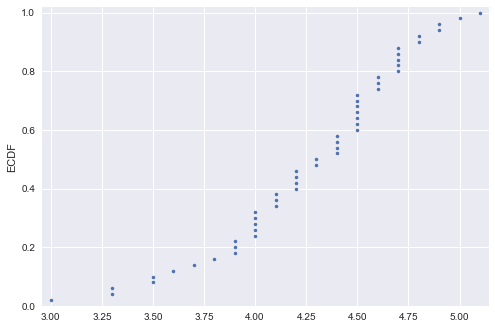

In [22]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot

_= plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
_=plt.margins(0.02)

# Label the axes
_=plt.xlabel('')
_=plt.ylabel('ECDF')


# Display the plot

_=plt.show()

### Comparison of ECDFs

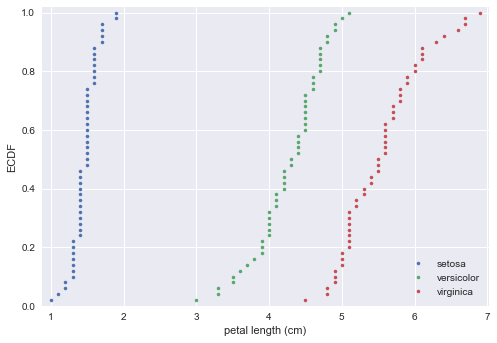

In [15]:
import numpy as np

# Load data from txt and create ndarray

setosa_petal_length = np.genfromtxt('datasets/setosa_petal_length.txt', delimiter=',')
versicolor_petal_length = np.genfromtxt('datasets/versicolor_petal_length.txt', delimiter=',')
virginica_petal_length = np.genfromtxt('datasets/virginica_petal_length.txt', delimiter=',')

# Compute ECDFs

x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot

_=plt.plot(x_set, y_set, marker='.', linestyle='none')
_=plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_=plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins

_=plt.margins(0.02)
_=plt.margins(0.02)
_=plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## Quantitative exploratory data analysis

### Computing means

In [26]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)


# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### Percentiles, outliers, and box plots. Computing percentiles.

Median is the name for the 50th percentile, that means that 50% of the data is less than the median. 

In [27]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


### Comparing percentiles to ECDF

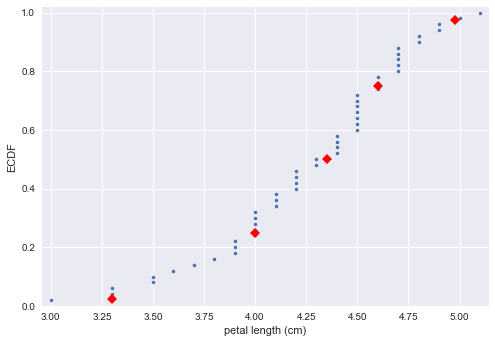

In [28]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

_=plt.show()

### Box-and-whisker plot

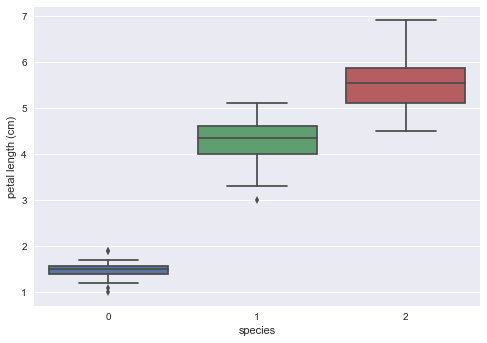

In [29]:
# Create box plot with Seaborn's default settings
_=sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_=plt.xlabel('species')
_=plt.ylabel('petal length (cm)')

# Show the plot
_=plt.show()

### Computing the variance

In [30]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_np, variance_explicit)

0.2164 0.2164


### The standard deviation and the variance

In [31]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.465188133985
0.465188133985


### Scatter plots

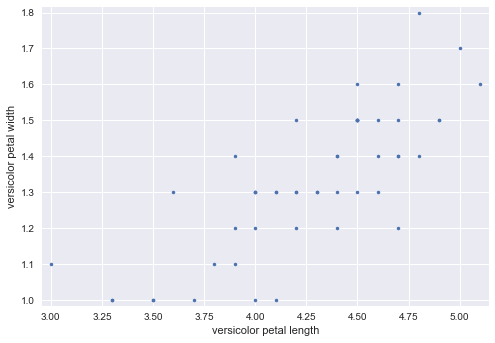

In [34]:
# Load numpy array from textfile
versicolor_petal_width = np.genfromtxt('datasets/versicolor_petal_width.txt', delimiter=',') 

# Make a scatter plot
_=plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Set margins
_=plt.margins(0.02)

# Label the axes
_=plt.xlabel('versicolor petal length')
_=plt.ylabel('versicolor petal width')

# Show the result
_=plt.show()

### Computing the covariance

In [36]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)


# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]
0.0731020408163


### Computing the Pearson correlation coefficient

In [37]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)    

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.786668088523
